In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
print(x_train[10].shape)

(28, 28)


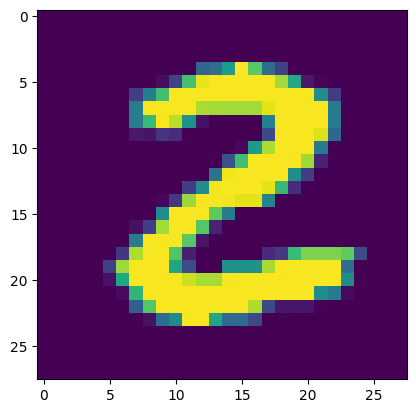

2


In [7]:
plt.imshow(x_train[25])
plt.show()
print(y_train[25])

In [8]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [9]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
print(x_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

C:\Users\HP-PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8496 - loss: 0.5195
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9574 - loss: 0.1436
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9701 - loss: 0.1010
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9766 - loss: 0.0783
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9806 - loss: 0.0634
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9843 - loss: 0.0522
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9864 - loss: 0.0439
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9889 - loss: 0.0367
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9903 - loss: 0.0328
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9909 - loss: 0.0300


In [15]:
loss,accuracy = model.evaluate(x_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9685 - loss: 0.1264
0.972000002861023


In [16]:
print(x_test.shape)

(10000, 28, 28)


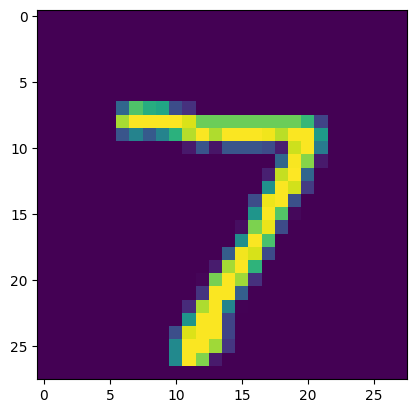

In [17]:
plt.imshow(x_test[0])
plt.show()

In [18]:
print(y_test[0])

7


In [19]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [20]:
print(y_pred.shape)

(10000, 10)


In [21]:
print(y_pred[0])

[8.8487740e-04 3.8619980e-04 1.9360979e-01 9.9312705e-01 5.6138724e-06
 1.5141370e-04 1.8935634e-11 9.9999958e-01 1.1892902e-03 9.8803884e-01]


In [22]:
label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [23]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 5, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [24]:
conf_mat = confusion_matrix(y_test,y_pred_labels)

In [25]:
print(conf_mat)

tf.Tensor(
[[ 960    0    3    0    3    1    3    0    1    9]
 [   0 1114    3    3    6    0    1    3    4    1]
 [   5    1  998    4    6    1    3    6    8    0]
 [   0    0    2  984    0   11    0    3    4    6]
 [   2    0    1    1  965    1    3    2    0    7]
 [   2    0    0   11    2  867    3    1    3    3]
 [   3    1    3    0    8   13  928    1    1    0]
 [   0    2    8    1    4    0    0  994    7   12]
 [   3    0    2   11    4   11    1    4  937    1]
 [   0    2    0    3   18    5    0    4    4  973]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

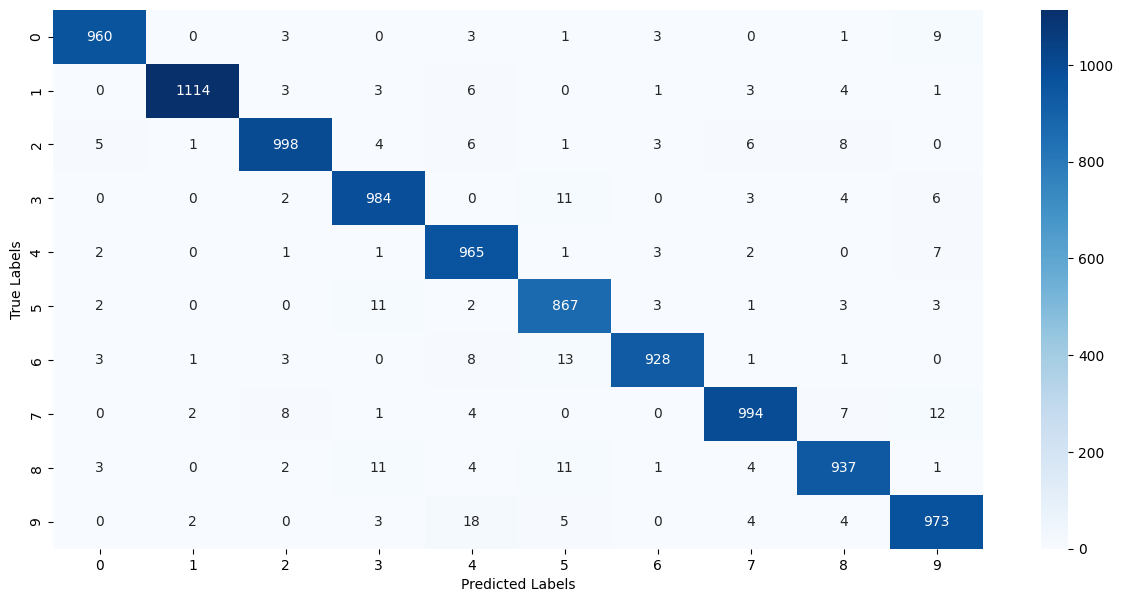

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [28]:
input_image_path = r"C:\Users\HP-PC\Desktop\Python data analytics\MNIST_digit_photo.png"

In [29]:
input_image = cv2.imread(input_image_path)

In [30]:
type(input_image)

numpy.ndarray

In [31]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [32]:
input_image.shape

(318, 318, 3)

In [34]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [35]:
grayscale.shape

(318, 318)

In [36]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [38]:
input_image_resize.shape

(28, 28)

In [40]:
type(input_image_resize)

numpy.ndarray

In [41]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [42]:
input_prediction = model.predict(image_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [43]:
print(input_prediction)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]]


In [44]:
input_pred_label = np.argmax(input_prediction)

In [45]:
print(input_pred_label)

3


In [53]:
print("Image Path:", input_image_path)


Image Path: input_image_path = r"C:\Users\HP-PC\Desktop\Python data analytics\MNIST_digit_photo.png"


In [57]:
import cv2
import numpy as np

input_image_path = r"C:\Users\HP-PC\Desktop\Python data analytics\MNIST_digit_photo.png"
input_image = cv2.imread(input_image_path)

if input_image is None:
    print("Error: Unable to load the image. Check the file path.")
    exit()

grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize / 255.0
image_reshaped = np.reshape(input_image_resize, (1, 28, 28))
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print('The Handwritten Digit is recognised as', input_pred_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The Handwritten Digit is recognised as 3
